In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import skimage.io
import keras.backend as K
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import ResNet50
from keras.layers import Dense, Flatten, Dropout,BatchNormalization ,Activation
from keras.models import Model, Sequential
from keras.applications.nasnet import NASNetLarge
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from keras.optimizers import Adam

In [2]:
train_dir = '../archive/train'
test_dir = '../archive/test'

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   validation_split = 0.2,
                                  
        rotation_range=5,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        #zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='nearest')

valid_datagen = ImageDataGenerator(rescale = 1./255,
                                  validation_split = 0.2)

test_datagen  = ImageDataGenerator(rescale = 1./255
                                  )

In [4]:
train_dataset  = train_datagen.flow_from_directory(directory = train_dir,
                                                   target_size = (48,48),
                                                   class_mode = 'categorical',
                                                   subset = 'training',
                                                   batch_size = 64)
valid_dataset = valid_datagen.flow_from_directory(directory = train_dir,
                                                  target_size = (48,48),
                                                  class_mode = 'categorical',
                                                  subset = 'validation',
                                                  batch_size = 64)
test_dataset = test_datagen.flow_from_directory(directory = test_dir,
                                                  target_size = (48,48),
                                                  class_mode = 'categorical',
                                                  batch_size = 64)

Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


(48, 48, 3)
(1, 48, 48, 3)


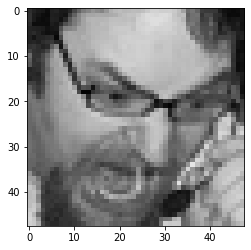

In [6]:
img = tf.keras.preprocessing.image.load_img("archive/test/angry/PrivateTest_10131363.jpg",target_size=(48,48))
img = np.array(img)
plt.imshow(img)
print(img.shape)

img = np.expand_dims(img, axis=0)
from keras.models import load_model
print(img.shape)

In [8]:
base_model = tf.keras.applications.ResNet50(input_shape=(48,48,3),include_top=False,weights="imagenet")

In [9]:
for layer in base_model.layers[:-4]:
    layer.trainable=False

In [14]:
model=Sequential()
model.add(base_model)
model.add(Dropout(0.5))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(32,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(32,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(32,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(7,activation='softmax'))

model.compile(optimizer='Adam', loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2, 2, 2048)        23587712  
                                                                 
 dropout_6 (Dropout)         (None, 2, 2, 2048)        0         
                                                                 
 flatten_2 (Flatten)         (None, 8192)              0         
                                                                 
 batch_normalization_8 (Batc  (None, 8192)             32768     
 hNormalization)                                                 
                                                                 
 dense_8 (Dense)             (None, 32)                262176    
                                                                 
 batch_normalization_9 (Batc  (None, 32)               128       
 hNormalization)                                      

In [13]:
# from IPython.display import Image
# tf.keras.utils.plot_model(model, to_file='convnet.png', show_shapes=True,show_layer_names=True)
# Image(filename='convnet.png') 

In [15]:
history=model.fit(train_dataset,validation_data=valid_dataset,epochs = 60,verbose = 1)

Epoch 1/60
359/359 [==============================] - 27s 58ms/step - loss: 1.9029 - accuracy: 0.2197 - val_loss: 1.8444 - val_accuracy: 0.2395
Epoch 2/60
359/359 [==============================] - 19s 54ms/step - loss: 1.8362 - accuracy: 0.2380 - val_loss: 1.8249 - val_accuracy: 0.2468
Epoch 3/60
359/359 [==============================] - 19s 53ms/step - loss: 1.8233 - accuracy: 0.2406 - val_loss: 1.8135 - val_accuracy: 0.2500
Epoch 4/60
359/359 [==============================] - 18s 51ms/step - loss: 1.8206 - accuracy: 0.2459 - val_loss: 1.8028 - val_accuracy: 0.2503
Epoch 5/60
359/359 [==============================] - 19s 52ms/step - loss: 1.8158 - accuracy: 0.2457 - val_loss: 1.8067 - val_accuracy: 0.2491
Epoch 6/60
359/359 [==============================] - 19s 53ms/step - loss: 1.8103 - accuracy: 0.2489 - val_loss: 1.7965 - val_accuracy: 0.2536
Epoch 7/60
359/359 [==============================] - 19s 52ms/step - loss: 1.8096 - accuracy: 0.2502 - val_loss: 1.7936 - val_accuracy:

KeyboardInterrupt: 